# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [13]:
import wbdata as wb
import pandas as pd

# Definir países e indicadores
countries = ["ARG", "BRA"]  # Argentina y Brasil (ISO3)
indicators = {
    'NY.GDP.MKTP.CD': 'PIB (USD)',
    'SP.POP.TOTL': 'Población total'
}

# Obtener datos y convertir 'date' a datetime
data = wb.get_dataframe(indicators, country=countries)
data = data.reset_index()
data['date'] = pd.to_datetime(data['date'])

# Filtrar últimos 5 años
ultimos_años = 5
año_corte = data['date'].max() - pd.DateOffset(years=ultimos_años)
data_reciente = data[data['date'] >= año_corte]

# Reorganizar datos
data_pivot = data_reciente.pivot(index='date', columns='country', 
                                values=list(indicators.values()))

# Formatear números como enteros
pd.set_option('display.float_format', '{:.0f}'.format)  # Desactiva notación científica

print(data_pivot)

              PIB (USD)               Población total          
country       Argentina        Brazil       Argentina    Brazil
date                                                           
2018-01-01 524819892360 1916933898038        44654882 206107261
2019-01-01 447754683615 1873288205186        44973465 207455459
2020-01-01 385740508437 1476107231194        45191965 208660842
2021-01-01 486564085480 1670647399035        45312281 209550294
2022-01-01 632790070063 1951923942083        45407904 210306415
2023-01-01 646075277525 2173665655937        45538401 211140729


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.


   ESTADÍSTICAS DESCRIPTIVAS (ARG vs. BRA)

PIB (USD):
           count              mean             std               min  \
country                                                                
Argentina     10   544,597,419,057  87,732,220,413   385,740,508,437   
Brazil        10 1,918,003,072,556 271,620,635,997 1,476,107,231,194   

                        25%               50%               75%  \
country                                                           
Argentina   496,128,037,200   541,925,997,197   623,279,873,901   
Brazil    1,797,323,163,716 1,895,111,051,612 2,035,617,218,522   

                        max  
country                      
Argentina   646,075,277,525  
Brazil    2,456,043,727,199  

Población total:
           count        mean       std         min         25%         50%  \
country                                                                      
Argentina     10  44,576,919   873,005  43,024,071  43,997,458  44,814,174   
Brazil        

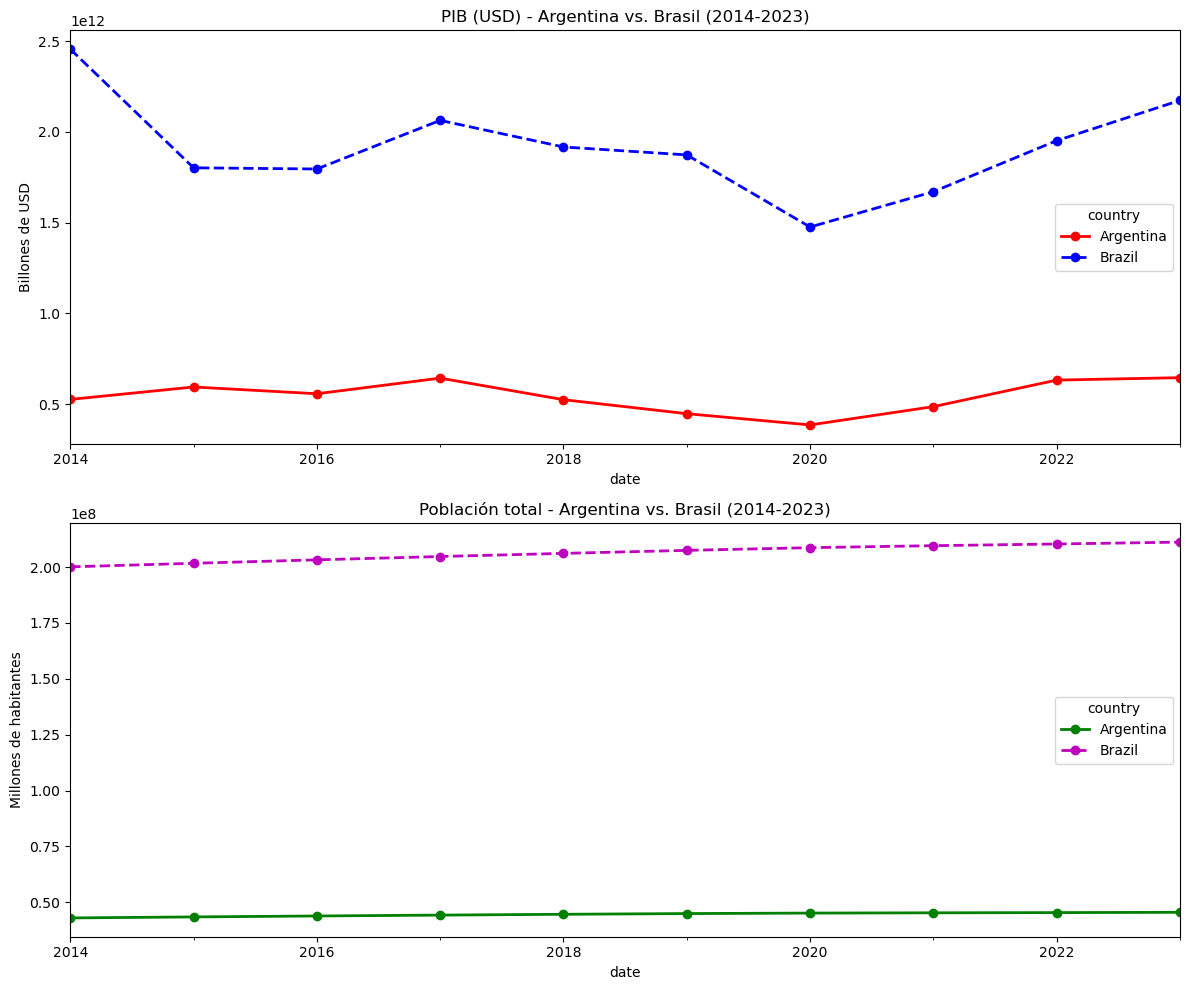

In [6]:
# Resolver acá
import wbdata as wb
import pandas as pd
import matplotlib.pyplot as plt

# Configurar pandas para mostrar números enteros
pd.set_option('display.float_format', '{:,.0f}'.format)

# Obtener datos de la API
countries = ["ARG", "BRA"]  # Códigos ISO3
indicators = {
    'NY.GDP.MKTP.CD': 'PIB (USD)',
    'SP.POP.TOTL': 'Población total'
}
data = wb.get_dataframe(indicators, country=countries).reset_index()
data['date'] = pd.to_datetime(data['date'])

# Filtrar últimos 10 años (ejemplo: 2014-2023)
data = data[data['date'] >= '2014-01-01']

# Estadísticas descriptivas por país
print("\n" + "="*50)
print("   ESTADÍSTICAS DESCRIPTIVAS (ARG vs. BRA)")
print("="*50 + "\n")

# PIB
stats_pib = data.groupby('country')['PIB (USD)'].describe()
print("PIB (USD):")
print(stats_pib)

# Población
stats_pob = data.groupby('country')['Población total'].describe()
print("\nPoblación total:")
print(stats_pob)

# Gráficos comparativos
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de PIB
data_pivot_pib = data.pivot(index='date', columns='country', values='PIB (USD)')
data_pivot_pib.plot(
    ax=axes[0], 
    title='PIB (USD) - Argentina vs. Brasil (2014-2023)', 
    style=['r-', 'b--'], 
    lw=2, 
    marker='o'
)
axes[0].set_ylabel("Billones de USD")

# Gráfico de Población
data_pivot_pob = data.pivot(index='date', columns='country', values='Población total')
data_pivot_pob.plot(
    ax=axes[1], 
    title='Población total - Argentina vs. Brasil (2014-2023)', 
    style=['g-', 'm--'], 
    lw=2, 
    marker='o'
)
axes[1].set_ylabel("Millones de habitantes")

plt.tight_layout()
plt.show()


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

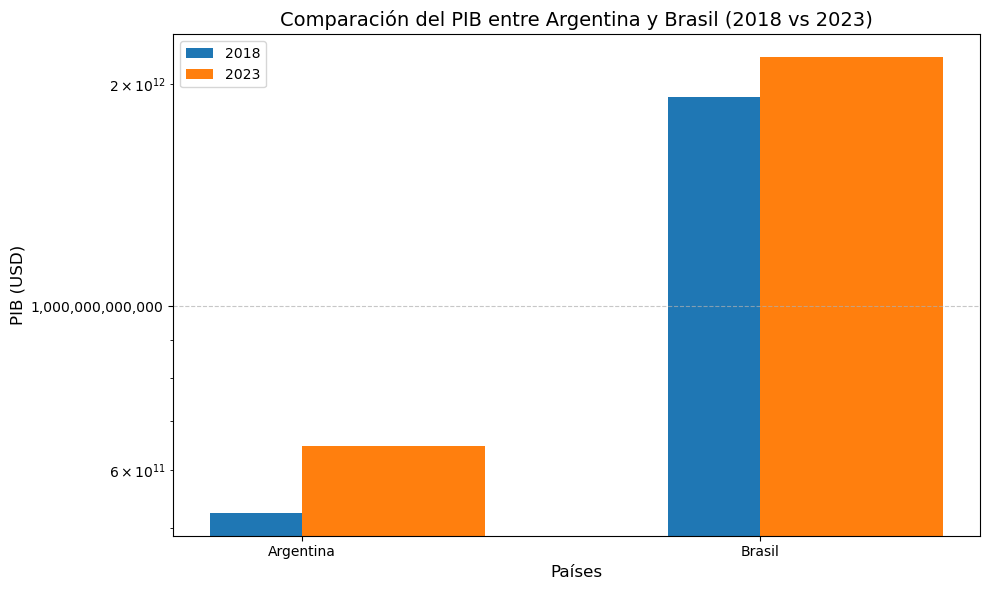

In [7]:
import matplotlib.pyplot as plt

# Datos del PIB de Argentina y Brasil
paises = ['Argentina', 'Brasil']
pib_2018 = [524819892360, 1916933898038]
pib_2023 = [646075277525, 2173665655937]

# Configuración del gráfico
plt.figure(figsize=(10, 6))
plt.bar(paises, pib_2018, width=0.4, label='2018', align='center')
plt.bar(paises, pib_2023, width=0.4, label='2023', align='edge')

# Personalización
plt.title('Comparación del PIB entre Argentina y Brasil (2018 vs 2023)', fontsize=14)
plt.xlabel('Países', fontsize=12)
plt.ylabel('PIB (USD)', fontsize=12)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Formatear los ticks del eje y para mostrar valores completos
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


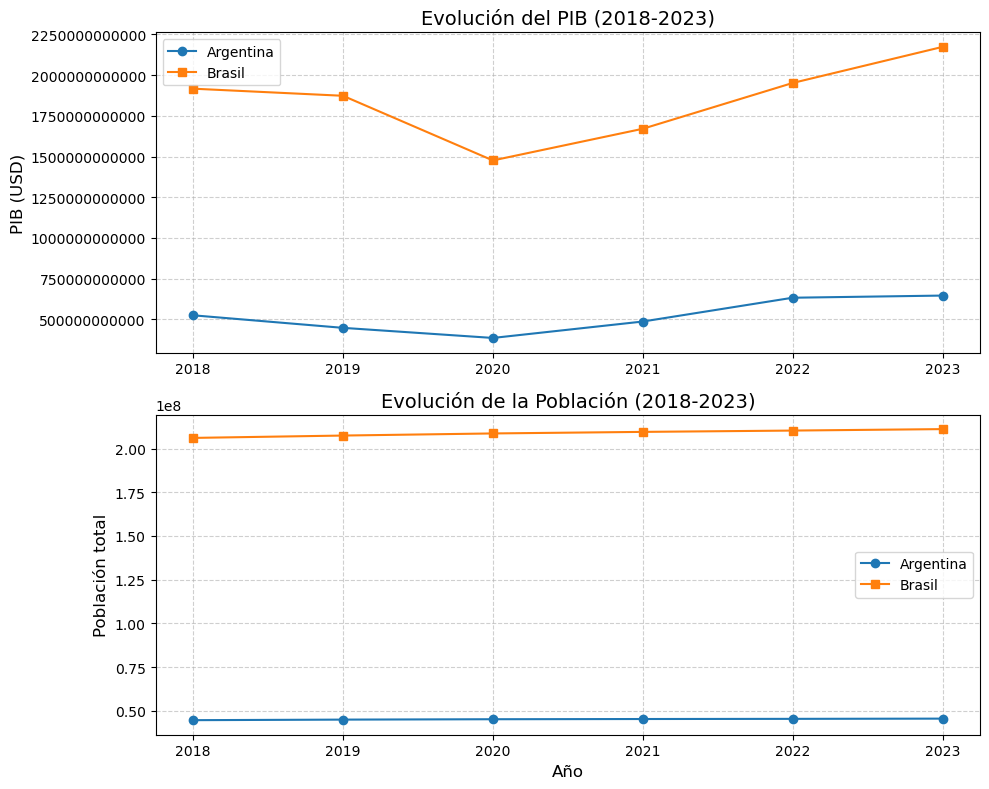

In [9]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Datos
years = ['2018', '2019', '2020', '2021', '2022', '2023']
pib_arg = [524819892360, 447754683615, 385740508437, 486564085480, 632790070063, 646075277525]
pib_bra = [1916933898038, 1873288205186, 1476107231194, 1670647399035, 1951923942083, 2173665655937]
pobl_arg = [44654882, 44973465, 45191965, 45312281, 45407904, 45538401]
pobl_bra = [206107261, 207455459, 208660842, 209550294, 210306415, 211140729]

# Gráfico superior - Evolución del PIB
ax1.plot(years, pib_arg, marker='o', label='Argentina')
ax1.plot(years, pib_bra, marker='s', label='Brasil')
ax1.set_title('Evolución del PIB (2018-2023)', fontsize=14)
ax1.set_ylabel('PIB (USD)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend()
ax1.ticklabel_format(style='plain', axis='y')

# Gráfico inferior - Evolución de la Población
ax2.plot(years, pobl_arg, marker='o', label='Argentina')
ax2.plot(years, pobl_bra, marker='s', label='Brasil')
ax2.set_title('Evolución de la Población (2018-2023)', fontsize=14)
ax2.set_xlabel('Año', fontsize=12)
ax2.set_ylabel('Población total', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.lanacion.com.ar/"

# Realizamos la petición a la página
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response = requests.get(url, headers=headers)

# Verificamos que la petición fue exitosa
if response.status_code == 200:
    # Parseamos el contenido HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Encontramos todos los elementos que contienen links a noticias
    news_links = []
    
    # Buscamos en diferentes secciones que suelen contener noticias
    for link in soup.find_all('a', href=True):
        href = link['href']
        # Filtramos links que parecen ser noticias
        if href.startswith(('/politica', '/economia', '/sociedad', '/el-mundo', 
                          '/deportes', '/cultura', '/tecnologia', '/ln+')):
            # Completamos el dominio si es necesario
            if not href.startswith('http'):
                href = 'https://www.lanacion.com.ar' + href
            # Aseguramos que no haya duplicados
            if href not in news_links:
                news_links.append(href)
    
    # Creamos un DataFrame con los links
    df = pd.DataFrame(news_links, columns=['Links de Noticias'])
    
    # Exportamos a Excel
    df.to_excel('noticias_lanacion.xlsx', index=False)
    print("Archivo Excel creado exitosamente con los links de noticias.")
    

Archivo Excel creado exitosamente con los links de noticias.
